## SciPy pour Scientific Python

[SciPy](https://docs.scipy.org/doc/scipy/reference/index.html) enrichit NumPy sur lequel il s'appuie. Il offre entre autre des outils

  * de statistique
  * d'optimisation
  * l'intégration numérique
  * de calcul matriciel
  * de transformation de Fourier
  * de traitement du signal
  * de traitement d'image
  * de résolution d'équations différentielles
    

### Integrales 

Les intégrales numériques sont définies dans le sous-paquet [scipy.integrate](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html).

Pour intégrer numériquement une fonction entre deux points, on peut utiliser `quad` :

In [1]:
import scipy.integrate as S

def f(x):
    return x**2

print(S.quad(f, 0, 2))
print("Right result:", 2**3/3)

(2.666666666666667, 2.960594732333751e-14)
Right result: 2.6666666666666665


La seconde valeur retournée par `quad` est l'estimation de l'erreur.

On peut aussi utilise `inf` de Numpy pour définir une limite infinie :

In [2]:
import numpy as np

def f(x):
    return 1/x**2

S.quad(f, 1, np.inf)

(1.0, 1.1102230246251565e-14)

### Fonction lambda

Il existe un racourci pour définir une fonction, raccourci qui plaira aux matheux et qui est bien pratique quand on doit donner une fonction en argument. Pour cela on utilise le mot clef `lambda` :

In [3]:
f = lambda x : 1/x**2  # same function as the one in the previous cell. In such case def is more explicit than lambda
f(10)

0.01

On peut aussi définir la fonction pour un usage unique et voici comment on utilise les lambdas 
comme argument de fonction :

In [4]:
S.quad(lambda x: x**3, -1, 1)

(0.0, 5.551208455924673e-15)

### Intégrale double

On peut calculer directement une intégrale double avec <a href="http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.dblquad.html">`dblquad`</a>.

Dans ce cas 

* la fonction a deux arguments, y et x (de l'intérieur vers l'extérieur)
* la première intégrale (extérieure) est en x avec ses bornes des réels
* le seconde intégrale (intérieure) est en y avec ses bornes qui dépendent de x et donc définies par des fonctions de x


In [5]:
i = S.dblquad(lambda y,x : y,              # function
              -2, 2,                       # x limits
              lambda x:-2, lambda x:x)[0]  # y limits

from IPython.display import Math
display(Math(r"\int_{-2}^{2} \; \int_{-2}^x \; y\; dy\; dx = %f" % i)) 

<IPython.core.display.Math object>

L'intégrale triple se calcule avec [`tplquad`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.tplquad.html).

### Calculer une fonction intégrale

En cumulant les intégrales de 0 à $\epsilon$, de $\epsilon$ à $2 \epsilon$... on obtient un tableau de valeur de la fonction intégrée qui permet d'obtenir la fonction intégrale $F$ de la fonction donnée $f$

$$
F(x) = \int f(\xi) \, d\xi = \int_0^x f(\xi) \, d\xi
$$
avec $F(0) = 0$  sachant que F est définie à une constante près.

Pour cela on utilise la fonction [`cumtrapz`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.cumtrapz.html) (cumulation d'intégrations par la méthode des trapèzes).

In [6]:
x = np.linspace(0, 4, num=20)        #   x
y = 1 + x**2                         # f(x)
y_int = S.cumtrapz(y, x, initial=0)  # F(x)

__Note__ : On va tracer une courbe pour valider notre résultat et pour cela on importe matplotlib. Il n'est pas nécessaire de comprendre comment on trace une courbe pour l'instant mais si vous êtes curieux, vous pouvez regarder le début de la première leçon du chapitre 7.

In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

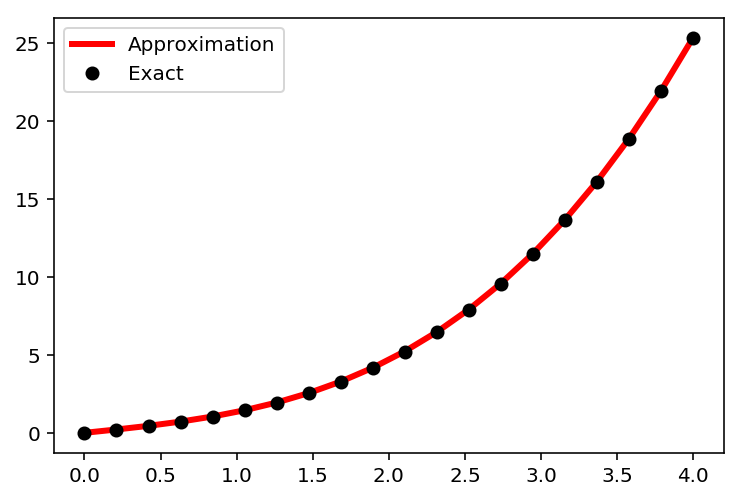

In [8]:
plt.plot(x, y_int, 'r',label=u"Approximation", linewidth=3)
plt.plot(x, x + x**3/3., 'ko', label=u"Exact")
plt.legend()

{{ PreviousNext("../lesson4 Numpy/np04 Notation Einstein.ipynb", "sp02 ODE.ipynb")}}